In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gray_to_rgb(binary, mask=[1, 1, 1]):
    apply_mask = np.multiply(np.reshape(np.array(mask), (3, 1, 1)), [binary]*3)
    rgb_img = np.stack(apply_mask, axis=2).astype(np.uint8)
    return rgb_img

%matplotlib inline

loaded and resized image


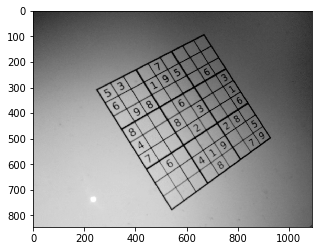

filtering
blur and adaptive threshold
blur1


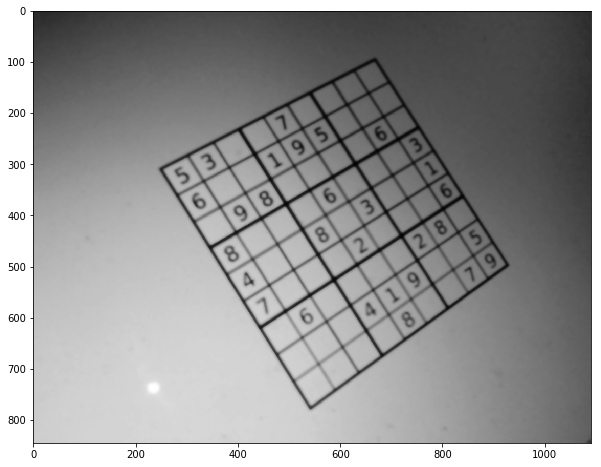

thresh


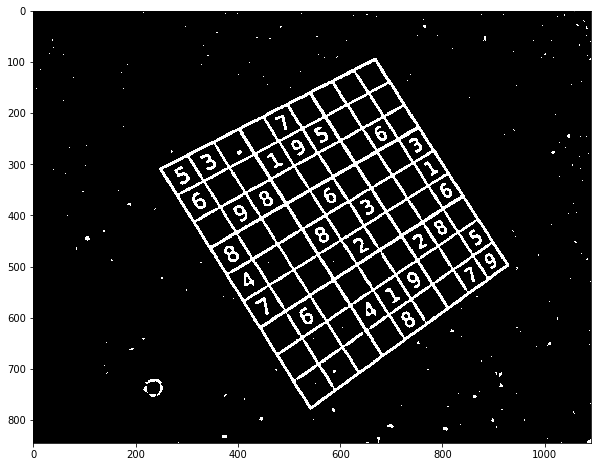

find contours


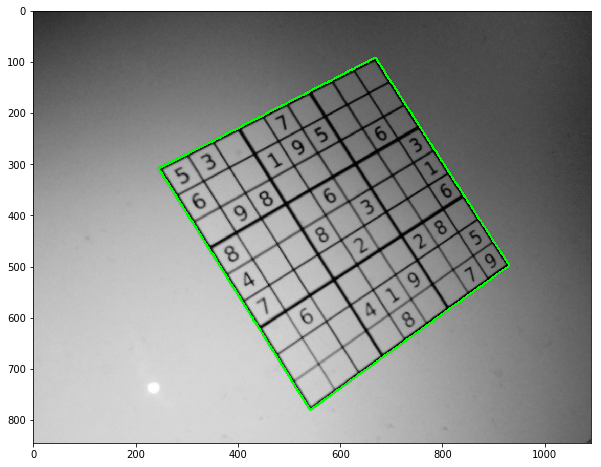

In [67]:
def filter_image(img, show_stages=True):
    DESIRABLE_AREA = 1280 * 720
#     DESIRABLE_AREA = 480 * 360
    current_area = img.shape[0]*img.shape[1]
    ratio =  DESIRABLE_AREA/current_area
#     print(DESIRABLE_AREA, current_area, img.shape, ratio, ratio**0.5)
    
    img = cv2.resize(img, (0,0), fx=ratio**0.5, fy=ratio**0.5)
    rgb_img = gray_to_rgb(img)
#     current_area = img.shape[0]*img.shape[1]
#     print(DESIRABLE_AREA, current_area, img.shape, DESIRABLE_AREA/current_area)
#     return
    if show_stages:
        print("loaded and resized image")
    if show_stages:
        plt.figure(figsize=(5, 5))
        plt.imshow(img, cmap='gray')
        plt.show()
    if show_stages:
        print("filtering")
    if show_stages:
        print("blur and adaptive threshold")
    kernel = np.ones((7, 7), np.float32)/49
#     curr = cv2.filter2D(img, -1, kernel)
    curr = cv2.bilateralFilter(img,9,75,75)
    if show_stages:
        print("blur1")
        plt.figure(figsize=(10,10))
        plt.imshow(curr, cmap="gray")
        plt.show()
   
    curr = 255-cv2.adaptiveThreshold(curr, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11,2)
    if show_stages:
        print("thresh")
        plt.figure(figsize=(10,10))
        plt.imshow(curr, cmap="gray")
        plt.show()
        
    size_th = 0.2*img.shape[0]*img.shape[1]
#     print(size_th)
    curr, contours, hierarchy = cv2.findContours(np.copy(curr),cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_NONE)
    sizes = np.array([cv2.contourArea(contour) for contour in contours ])
    
        
    biggest_contour = contours[np.argmax(sizes)]
   
    if show_stages or True:
        print("find contours")
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.drawContours(rgb_img, biggest_contour, -1, (0,255,0), 3))
        plt.show()
        
    
        
#     all_pts = [pt for pt in [(i, j) for i in range(len(curr[0])) for j in range(len(curr))] if cv2.pointPolygonTest(biggest_contours[0], pt, measureDist=False)>=0]

#     print(all_pts[:100])
        
#     curr = cv2.medianBlur(curr, 11)
#     if show_stages:
#         print("blur2")
#         plt.figure(figsize=(10,10))
#         plt.imshow(curr, cmap="gray")
#         plt.show()
        
#     curr = cv2.equalizeHist(np.around(cv2.distanceTransform(curr, cv2.DIST_L2, 5)).astype(np.uint8))
#     if show_stages:
#         print("dist")
#         plt.figure(figsize=(10,10))
#         plt.imshow(curr, cmap="gray")
#         plt.show()
#     curr = cv2.Canny(curr,0,50)
#     if show_stages:
#         print("canny")
#         plt.figure(figsize=(10,10))
#         plt.imshow(curr, cmap="gray")
#         plt.show()
   
    
#     kernel = np.ones((5,5),np.uint8)
#     curr = cv2.morphologyEx(curr, cv2.MORPH_CLOSE, kernel)
#     if show_stages:
#         plt.figure(figsize=(10,10))
#         plt.imshow(curr, cmap="gray")
#         plt.show()

#     kernel = np.ones((7,7),np.uint8)
#     curr = cv2.dilate(curr,kernel,iterations = 1)
#     if show_stages:
#         plt.figure(figsize=(10,10))
#         plt.imshow(curr, cmap="gray")
#         plt.show()
    
#     if show_stages:
#         print("final filtered image")
#     if show_stages:
#         plt.figure(figsize=(10,10))
#         plt.imshow(res, cmap="gray")
#         plt.show()
    return biggest_contour

img = cv2.imread("pics/test1.jpg", cv2.IMREAD_GRAYSCALE )    
filtered_img = filter_image(img)

test1.jpg
find contours


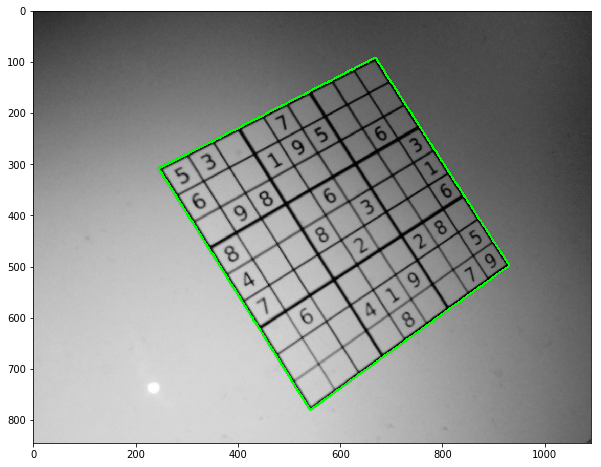

elapsed time(ms) 661.226


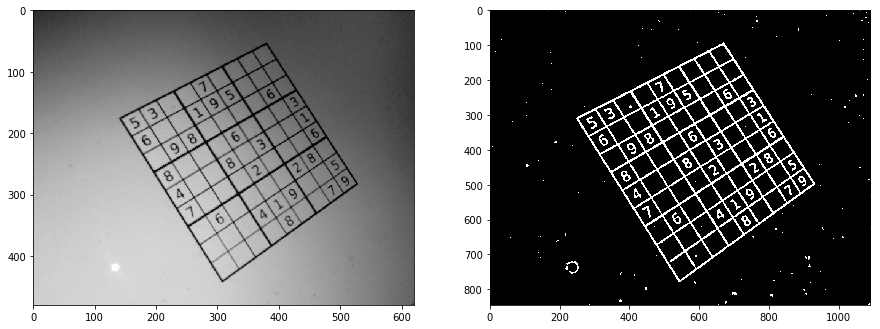

test10.jpg
find contours


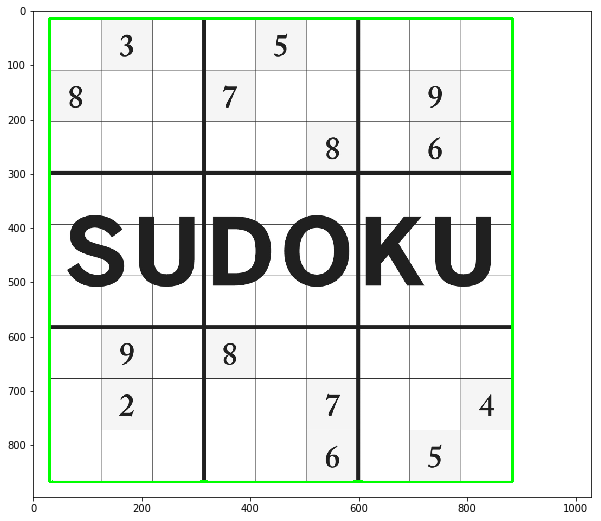

elapsed time(ms) 541.024


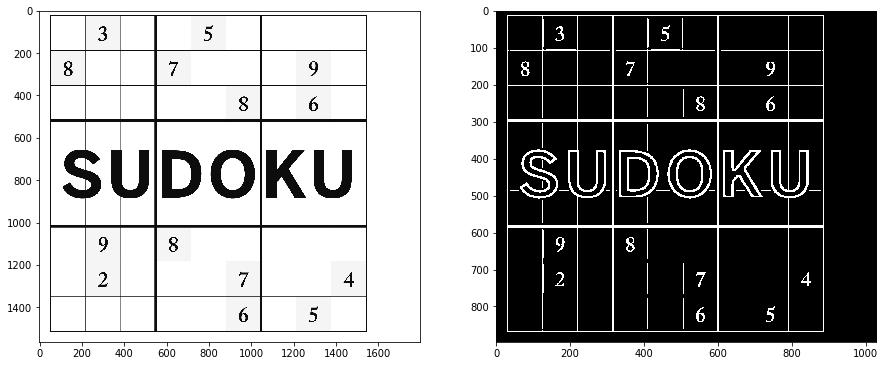

test11.jpg
find contours


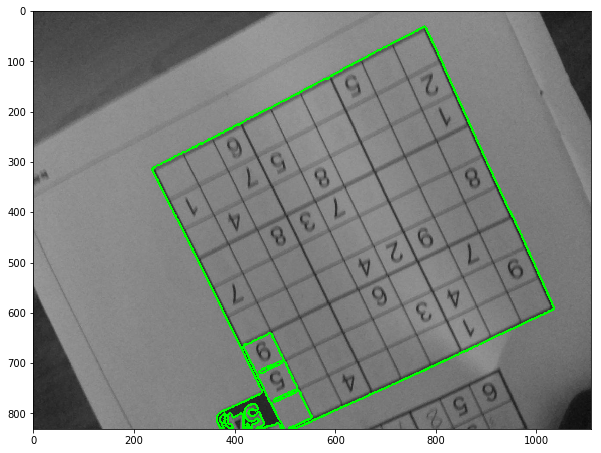

elapsed time(ms) 678.922


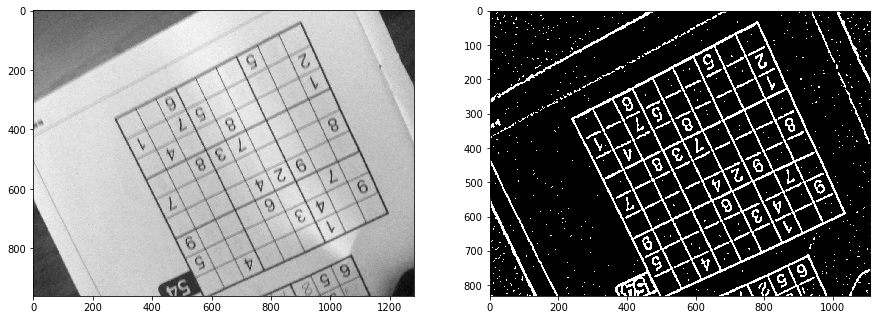

test12.jpg
find contours


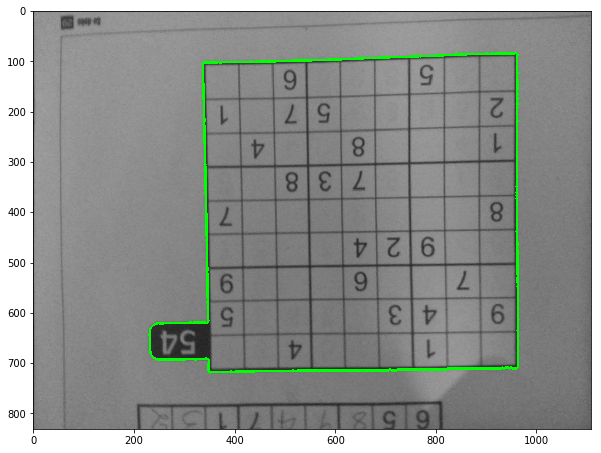

elapsed time(ms) 657.255


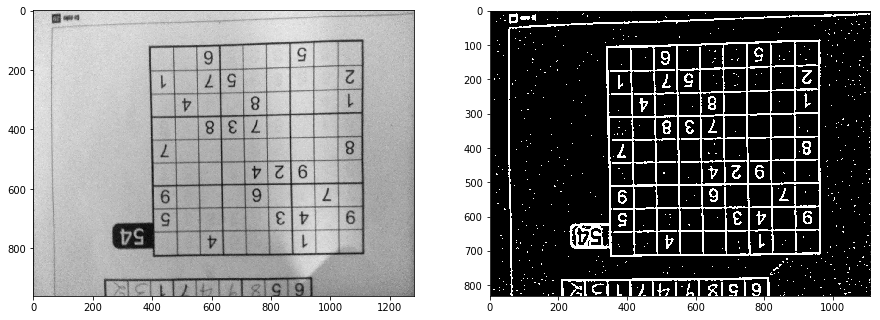

test2.jpg
find contours


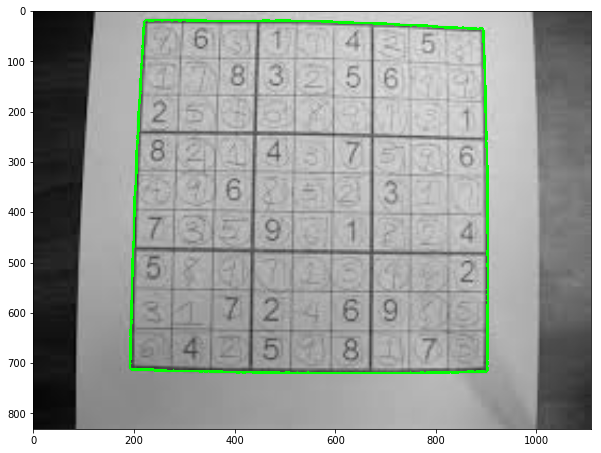

elapsed time(ms) 601.359


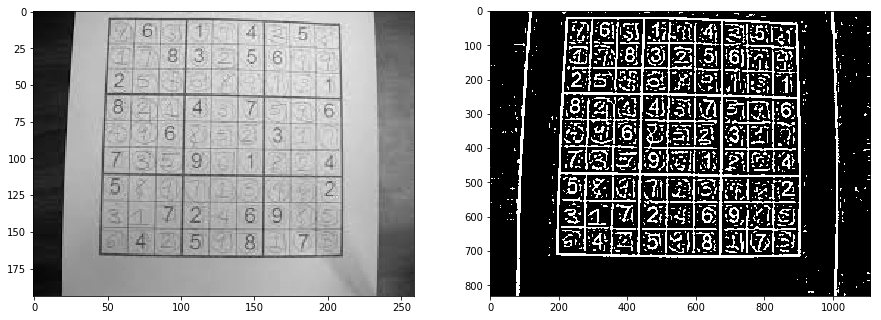

test3.jpg


IndexError: index 0 is out of bounds for axis 0 with size 0

In [65]:
import os
import datetime

for file in os.listdir("pics"):
    print(file)
    path = "pics/"+file
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE )
    # img = cv2.equalizeHist(img)
    start = datetime.datetime.now()
    res = filter_image(img, show_stages=False)
    elapsed = datetime.datetime.now()-start
    print("elapsed time(ms)", elapsed.microseconds/1000)
    plt.figure(figsize=(15,15))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap="gray")
    plt.subplot(1, 2, 2)
    plt.imshow(res, cmap="gray")
    plt.show()
